# Inference Demo for Cerrado Tree Species Detection Model 🚀

## 1. Check Torch setup

In [1]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import torch
from ultralytics import YOLO, RTDETR
import os

In [2]:
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)
print("Number of GPUs:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected :(")


CUDA Available: True
CUDA Version: 12.1
Number of GPUs: 1
GPU Name: NVIDIA GeForce GTX 1650


## 2. Detect Using Pretrained Best-Performing Models

### 2.1 Choose the input path for your data 
- Choose **RGB images** in the `/rgb-imgs` folder or **fused images** in the `/fused-imgs` folder

### 2.2 Choose the input path for your model
- Choose one of the models in the `/models` folder (make sure to use a model that is proper to your data input type!)

In [ ]:
# 2.1
data_type_path="../preprocessing/fused-imgs"
# 2.2
model_type_path="./models/yolov8s-fused.pt"

### 2.3 Predict based on previous choices

In [4]:
if model_type_path.startswith("./models/yolo"):
    model = YOLO(model_type_path)  
elif model_type_path.startswith("./models/rt"):
    model = RTDETR(model_type_path)  
else:
    raise ValueError("Invalid model type. Please use 'yolo' or 'rt-detr' models.")


# Run inference on the folder source
results = model.predict(source=data_type_path, save=True) 


image 1/11 /mnt/c/Users/eolic/OneDrive/Documentos/GitHub/cerrado-tree-id/detect/../preprocessing/rgb-imgs/processed-DJI_20250127100947_0154_RGB.jpg: 640x640 1 10, 1 20, 2 4s, 1 9, 157.5ms
image 2/11 /mnt/c/Users/eolic/OneDrive/Documentos/GitHub/cerrado-tree-id/detect/../preprocessing/rgb-imgs/processed-DJI_20250127100949_0155_RGB.jpg: 640x640 1 10, 3 17s, 1 20, 4 4s, 1 5, 1 9, 139.7ms
image 3/11 /mnt/c/Users/eolic/OneDrive/Documentos/GitHub/cerrado-tree-id/detect/../preprocessing/rgb-imgs/processed-DJI_20250127100952_0156_RGB.jpg: 640x640 2 19s, 1 20, 3 4s, 1 7, 1 9, 140.4ms
image 4/11 /mnt/c/Users/eolic/OneDrive/Documentos/GitHub/cerrado-tree-id/detect/../preprocessing/rgb-imgs/processed-DJI_20250127100954_0157_RGB.jpg: 640x640 1 14, 2 17s, 1 19, 6 4s, 1 7, 1 9, 136.8ms
image 5/11 /mnt/c/Users/eolic/OneDrive/Documentos/GitHub/cerrado-tree-id/detect/../preprocessing/rgb-imgs/processed-DJI_20250127100957_0158_RGB.jpg: 640x640 4 14s, 1 2, 4 4s, 1 7, 1 9, 142.0ms
image 6/11 /mnt/c/Users/

In [5]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '1', 1: '10', 2: '13', 3: '14', 4: '15', 5: '17', 6: '19', 7: '2', 8: '20', 9: '21', 10: '23', 11: '25', 12: '4', 13: '5', 14: '7', 15: '9'}
 obb: None
 orig_img: array([[[ 36,  57,  54],
         [ 78,  99,  96],
         [ 94, 115, 112],
         ...,
         [ 68, 102, 101],
         [122, 156, 155],
         [ 87, 121, 120]],
 
        [[ 13,  34,  31],
         [ 42,  63,  60],
         [ 78,  99,  96],
         ...,
         [ 53,  90,  88],
         [ 57,  91,  90],
         [ 26,  63,  61]],
 
        [[ 10,  31,  28],
         [ 15,  36,  33],
         [ 55,  76,  73],
         ...,
         [ 24,  64,  59],
         [ 15,  52,  48],
         [ 32,  72,  67]],
 
        ...,
 
        [[ 32,  43,  40],
         [ 39,  50,  47],
         [ 38,  49,  46],
         ...,
         [ 51,  63,  65],
         [ 41,  53,  55],
        

# 3. Display results ✨

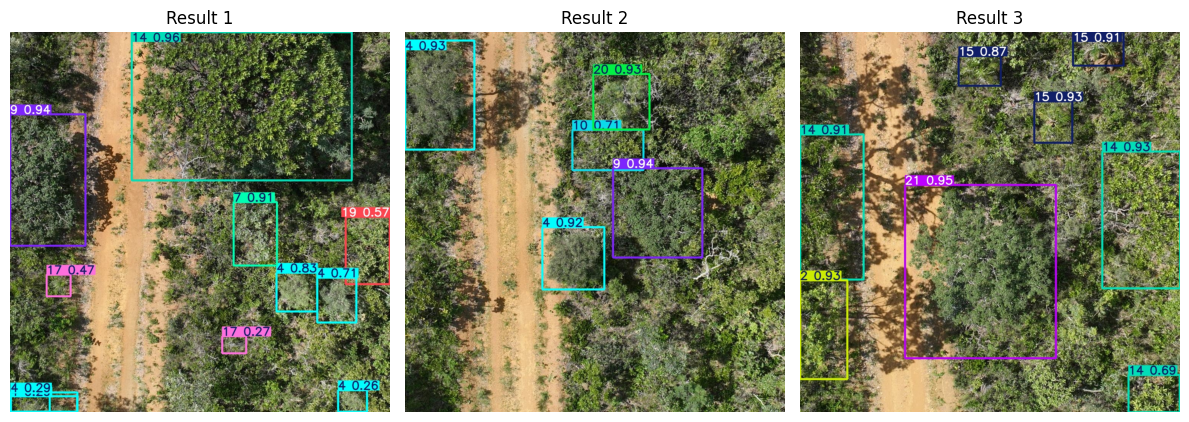

In [6]:
# Extract the list of saved image paths from the results object
saved_images = os.listdir(results[0].save_dir)  

# Randomly select images from the saved images
random_images = random.sample(saved_images, 3)

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for i, ax in enumerate(axes):
    if i < len(random_images):
        img = Image.open(f"{results[0].save_dir}/{random_images[i]}")
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Result {i+1}")
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
